<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Describe,-Info" data-toc-modified-id="Describe,-Info-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Describe, Info</a></span></li><li><span><a href="#Standardize-Headers" data-toc-modified-id="Standardize-Headers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Standardize Headers</a></span></li><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Null Values</a></span><ul class="toc-item"><li><span><a href="#Fill-Null-Values" data-toc-modified-id="Fill-Null-Values-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Fill Null Values</a></span></li></ul></li><li><span><a href="#Check-Duplicates" data-toc-modified-id="Check-Duplicates-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check Duplicates</a></span></li><li><span><a href="#Check-the-Target-Variable---offer_accepted" data-toc-modified-id="Check-the-Target-Variable---offer_accepted-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Check the Target Variable - offer_accepted</a></span><ul class="toc-item"><li><span><a href="#Creating-a-New-Column-Converting-'Yes'-to-1-and-'No'-to-0" data-toc-modified-id="Creating-a-New-Column-Converting-'Yes'-to-1-and-'No'-to-0-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Creating a New Column Converting 'Yes' to 1 and 'No' to 0</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#EDA-Numeric-and-Categorical" data-toc-modified-id="EDA-Numeric-and-Categorical-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>EDA Numeric and Categorical</a></span><ul class="toc-item"><li><span><a href="#Split-Numerical-and-Categorical" data-toc-modified-id="Split-Numerical-and-Categorical-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Split Numerical and Categorical</a></span></li><li><span><a href="#Dealing-with-Categorical" data-toc-modified-id="Dealing-with-Categorical-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Dealing with Categorical</a></span><ul class="toc-item"><li><span><a href="#Get_dummies" data-toc-modified-id="Get_dummies-1.7.2.1"><span class="toc-item-num">1.7.2.1&nbsp;&nbsp;</span>Get_dummies</a></span></li></ul></li><li><span><a href="#Dealing-with-Numerical" data-toc-modified-id="Dealing-with-Numerical-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Dealing with Numerical</a></span><ul class="toc-item"><li><span><a href="#Correlation-Matrix-for-Numerical-Values" data-toc-modified-id="Correlation-Matrix-for-Numerical-Values-1.7.3.1"><span class="toc-item-num">1.7.3.1&nbsp;&nbsp;</span>Correlation Matrix for Numerical Values</a></span></li><li><span><a href="#Visualizations-Numerical" data-toc-modified-id="Visualizations-Numerical-1.7.3.2"><span class="toc-item-num">1.7.3.2&nbsp;&nbsp;</span>Visualizations Numerical</a></span></li></ul></li></ul></li><li><span><a href="#Bring-the-Data-Together" data-toc-modified-id="Bring-the-Data-Together-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Bring the Data Together</a></span></li></ul></li><li><span><a href="#Export-CSV" data-toc-modified-id="Export-CSV-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Export CSV</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")
from matplotlib.colors import BASE_COLORS

In [2]:
df = pd.read_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\databases\creditcardmarketing.xlsx')

# EDA

## Describe, Info

In [3]:
x = df['Customer Number'].value_counts()
(x>1).value_counts() # drop the customer number - only unique values

False    18000
Name: Customer Number, dtype: int64

In [4]:
df= df.drop(['Customer Number'], axis=1)

In [5]:
df.head(5)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [6]:
df.describe()

,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  object 
 1   Reward                18000 non-null  object 
 2   Mailer Type           18000 non-null  object 
 3   Income Level          18000 non-null  object 
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Overdraft Protection  18000 non-null  object 
 6   Credit Rating         18000 non-null  object 
 7   # Credit Cards Held   18000 non-null  int64  
 8   # Homes Owned         18000 non-null  int64  
 9   Household Size        18000 non-null  int64  
 10  Own Your Home         18000 non-null  object 
 11  Average Balance       17976 non-null  float64
 12  Q1 Balance            17976 non-null  float64
 13  Q2 Balance            17976 non-null  float64
 14  Q3 Balance            17976 non-null  float64
 15  Q4 Balance         

## Standardize Headers
- all of them lowercase without space ('_'), without '#'
- change column name to: accounts_open

In [8]:
new_names={'# Bank Accounts Open' : 'Accounts Open', '# Credit Cards Held' : 'Credit Cards Held', '# Homes Owned' : 'Homes Owned' }
df.rename(columns=new_names, inplace=True)
cols=[]
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(' ','_'))
df.columns=cols
df.head(0)

,offer_accepted,reward,mailer_type,income_level,accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance


## Null Values
- 24 empty values in average balance, q1, q2, q3, q4 balance = study them

In [9]:
df.loc[df['average_balance'].isnull()]

,offer_accepted,reward,mailer_type,income_level,accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
323,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [10]:
df['average_balance'].isnull().value_counts()

False    17976
True        24
Name: average_balance, dtype: int64

### Fill Null Values
- we decided to fill them with the average of each column. We have 24 nulls in 18000 rows, so it's not a big deal.
- further we need to decide which columns are we going to use: the average_balance or the quarters columns, after that we need keep the one we choose and drop the other(s).

In [11]:
mean_q1 = df['q1_balance'].loc[df['q1_balance'].notnull()].median()
mean_q2 = df['q2_balance'].loc[df['q2_balance'].notnull()].median()
mean_q3 = df['q3_balance'].loc[df['q3_balance'].notnull()].median()
mean_q4 = df['q4_balance'].loc[df['q4_balance'].notnull()].median()
mean_balance = (mean_q1+mean_q2+mean_q3+mean_q4)/4

In [12]:
df['average_balance']=df['average_balance'].fillna(mean_balance)
df['q1_balance']=df['q1_balance'].fillna(mean_q1)
df['q2_balance']=df['q2_balance'].fillna(mean_q2)
df['q3_balance']=df['q3_balance'].fillna(mean_q3)
df['q4_balance']=df['q4_balance'].fillna(mean_q4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        18000 non-null  object 
 1   reward                18000 non-null  object 
 2   mailer_type           18000 non-null  object 
 3   income_level          18000 non-null  object 
 4   accounts_open         18000 non-null  int64  
 5   overdraft_protection  18000 non-null  object 
 6   credit_rating         18000 non-null  object 
 7   credit_cards_held     18000 non-null  int64  
 8   homes_owned           18000 non-null  int64  
 9   household_size        18000 non-null  int64  
 10  own_your_home         18000 non-null  object 
 11  average_balance       18000 non-null  float64
 12  q1_balance            18000 non-null  float64
 13  q2_balance            18000 non-null  float64
 14  q3_balance            18000 non-null  float64
 15  q4_balance         

## Check Duplicates
- no duplicates

In [14]:
dupli = df.duplicated()
dupli.unique()

array([False])

## Check the Target Variable - offer_accepted
- imbalanced data, will be necessary oversampling or undersampling

In [15]:
df['offer_accepted'].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

### Creating a New Column Converting 'Yes' to 1 and 'No' to 0
- so we can do a correlation matrix between the target and numerical and categorical values;

In [16]:
df['offer']= df.offer_accepted.map(dict(Yes=1, No=0))

In [17]:
df['offer'].value_counts()

0    16977
1     1023
Name: offer, dtype: int64

## Visualization

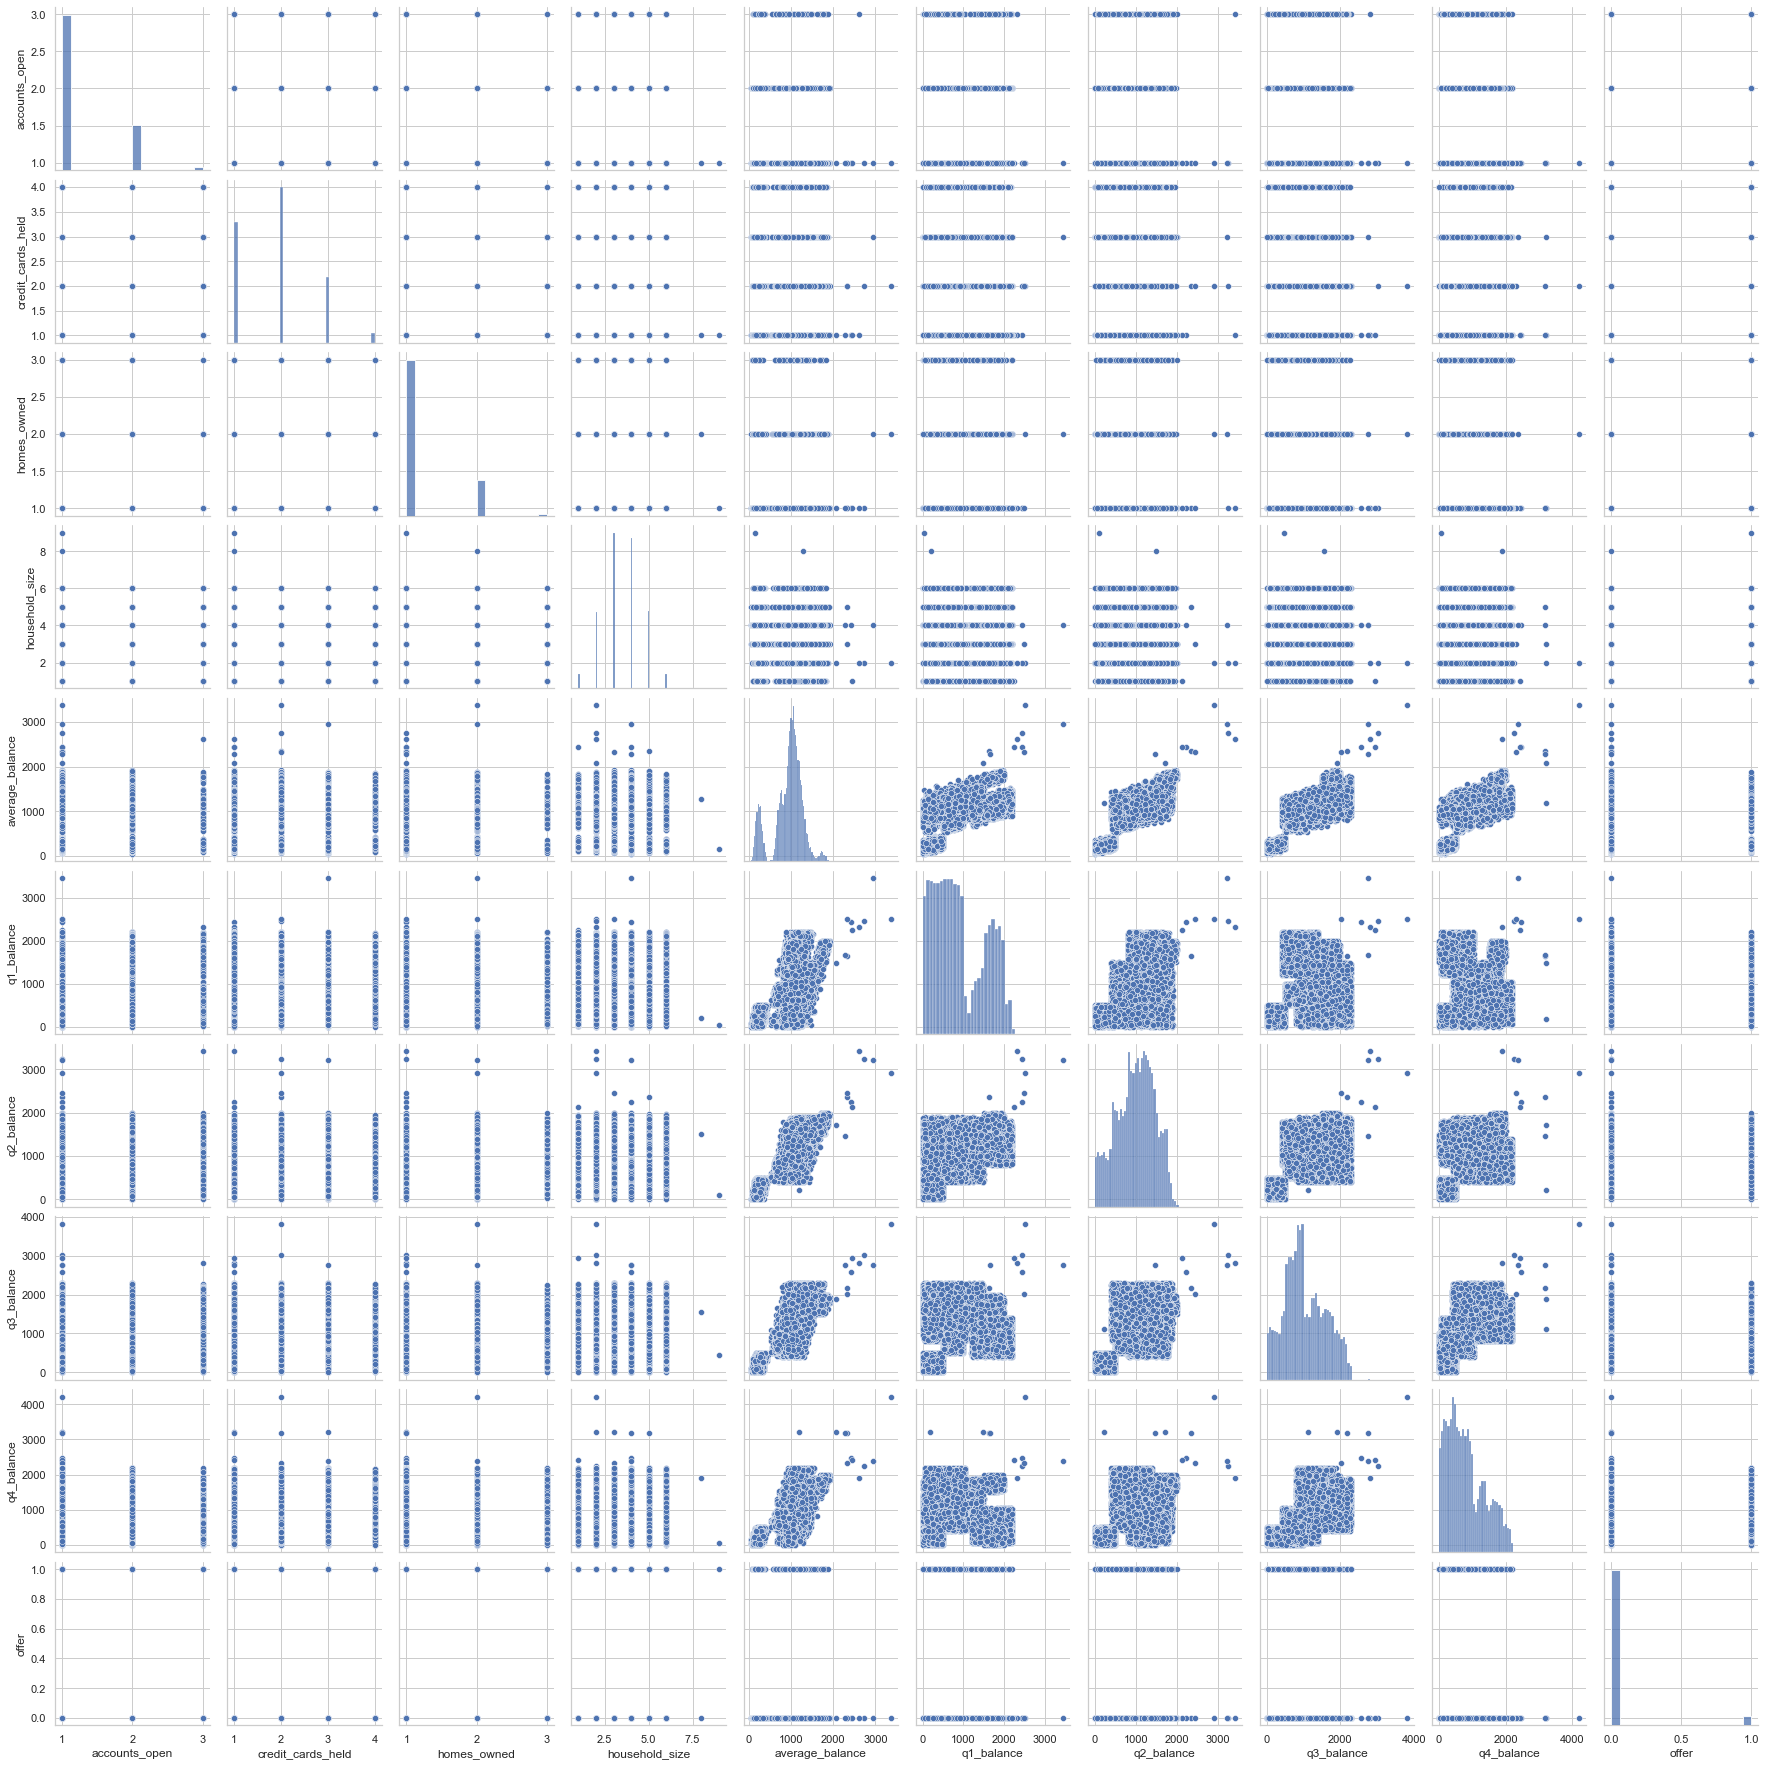

In [18]:
sns.pairplot(df);

## EDA Numeric and Categorical
- here we still have offer_accepted and offer;
- also we still have average_balance and the quarters columns;
- further we need to decide each of them are we going to use it and drop the others.

In [19]:
df1 = df

In [20]:
# df1 = df1.drop(['average_balance'], axis=1)

### Split Numerical and Categorical
- without splitting the target (offer_accepted)

In [21]:
df1_num=df1.select_dtypes(include=np.number) # OR include=number
df1_cat=df1.select_dtypes(exclude=np.number)# OR include=object

In [22]:
df1_num.head(1)

,accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer
0,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0


In [23]:
df1_cat.head(1)

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No


### Dealing with Categorical 

#### Get_dummies
- Convert categorical variable into dummy/indicator variables.

In [24]:
df1_cat_dummies=pd.get_dummies(df1_cat, drop_first=True)

In [25]:
df1_cat_dummies.head(1)

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,0


In [26]:
df1_cat_dummies['offer_accepted_Yes'].value_counts()

0    16977
1     1023
Name: offer_accepted_Yes, dtype: int64

### Dealing with Numerical
#### Correlation Matrix for Numerical Values

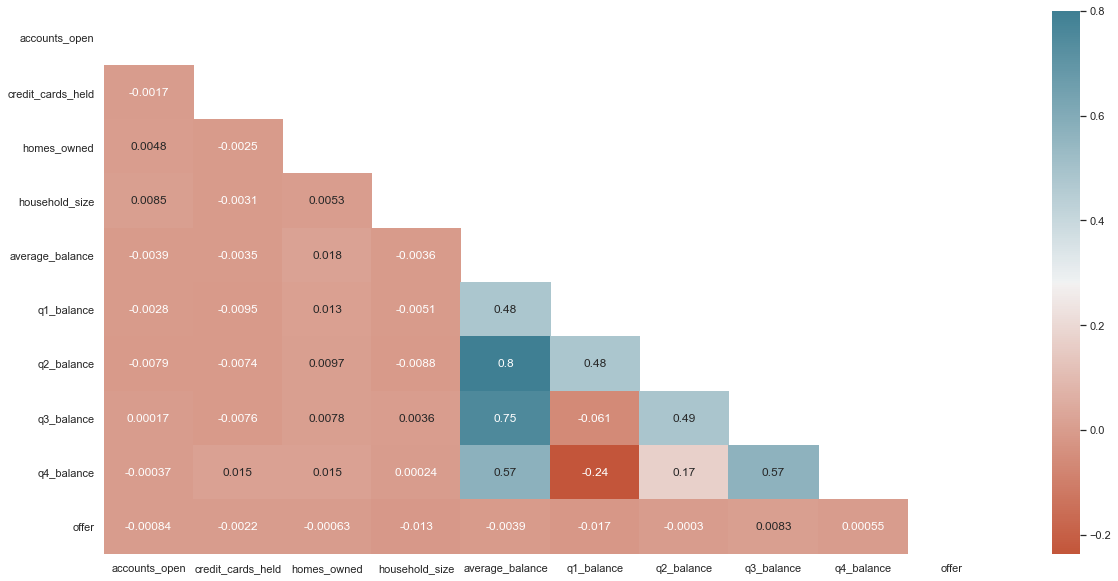

In [27]:
corre_matrix=df1_num.corr()
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(corre_matrix, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=2000));

#### Visualizations Numerical

In [28]:
import warnings
warnings.filterwarnings("ignore")
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in df.columns:
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

In [29]:
df1_hist_num=df1_num

In [30]:
to_drop = ['q1_balance', 'q2_balance','q3_balance', 'q4_balance', 'offer',]
df1_hist_num.drop(to_drop, axis = 1, inplace = True)

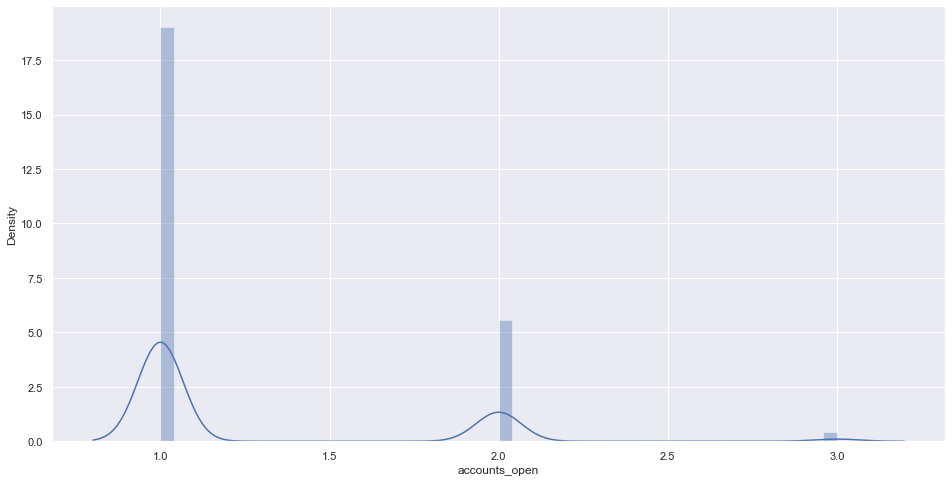

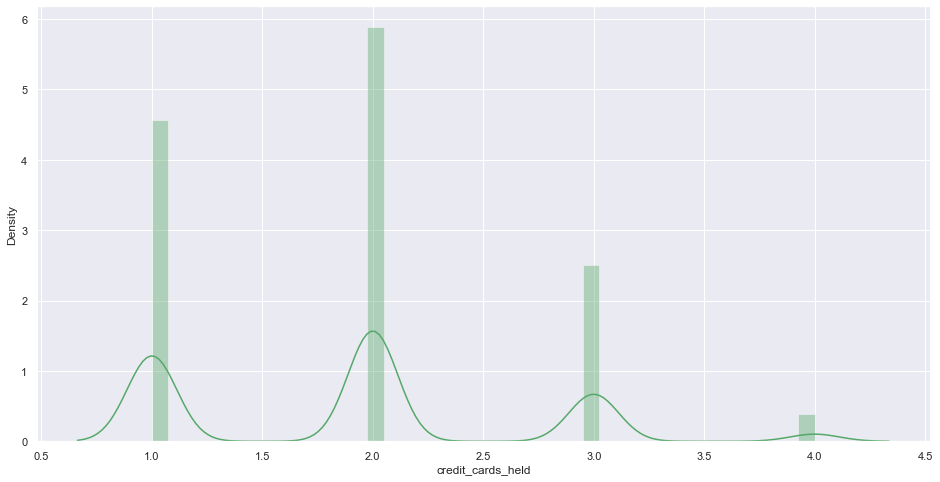

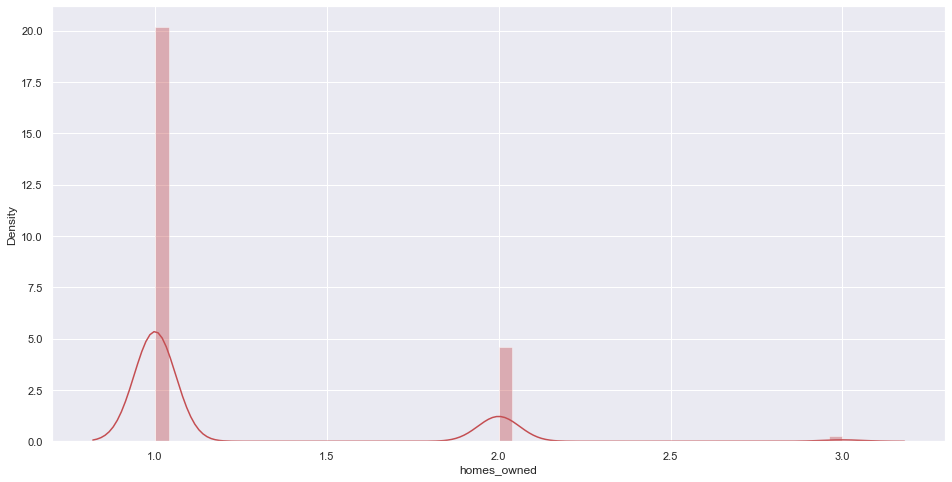

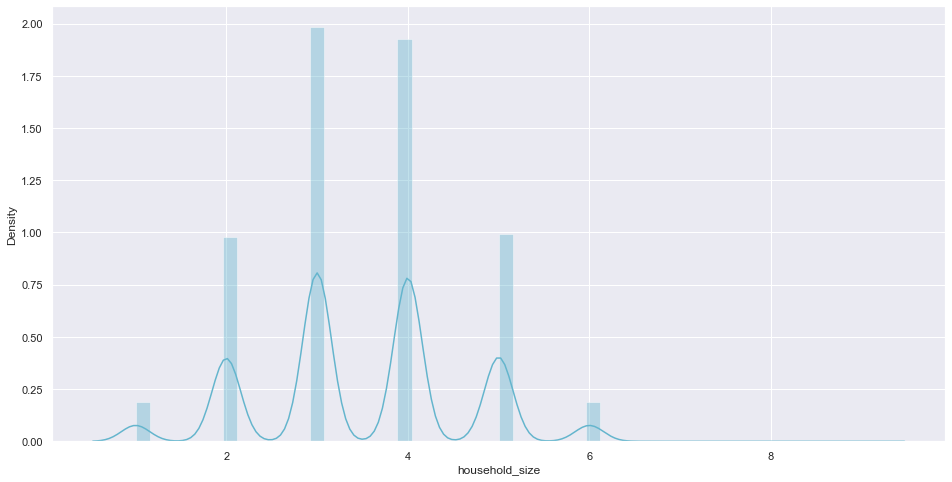

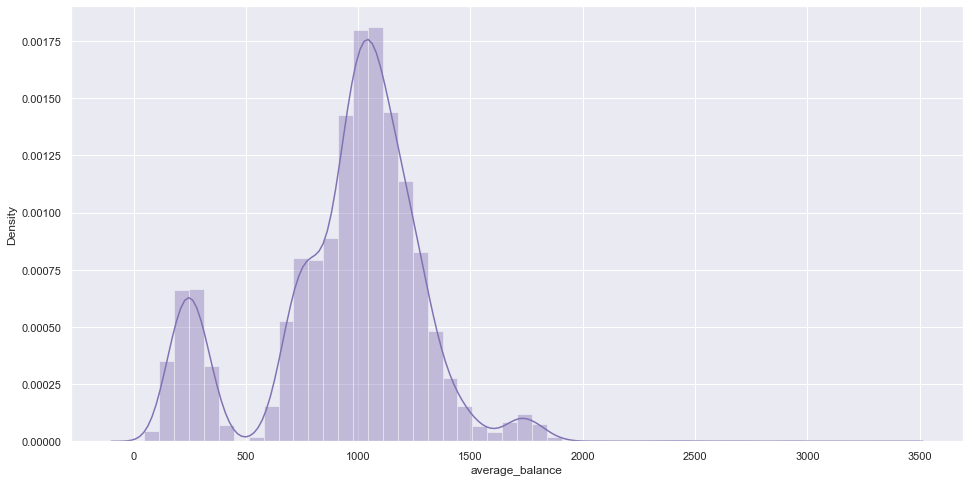

In [31]:
df_hist(df1_hist_num)

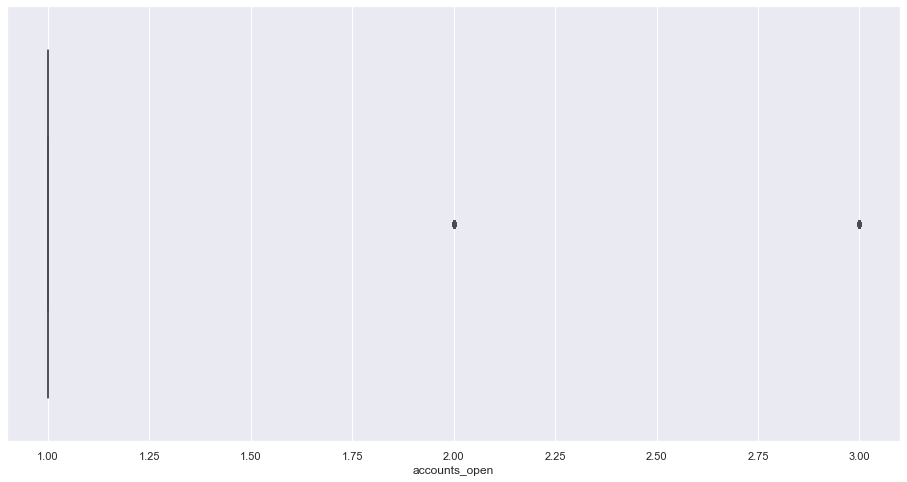

1st Quartile:  1.0  3rd Quartile:  1.0


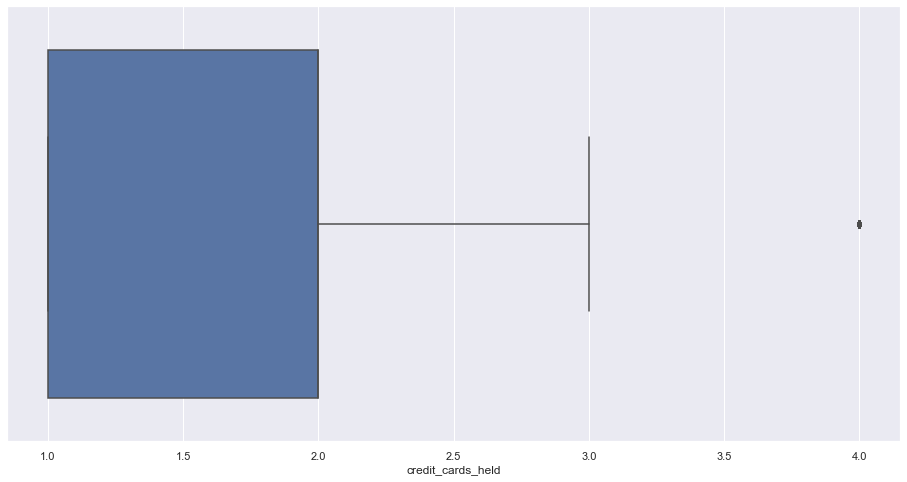

1st Quartile:  1.0  3rd Quartile:  2.0


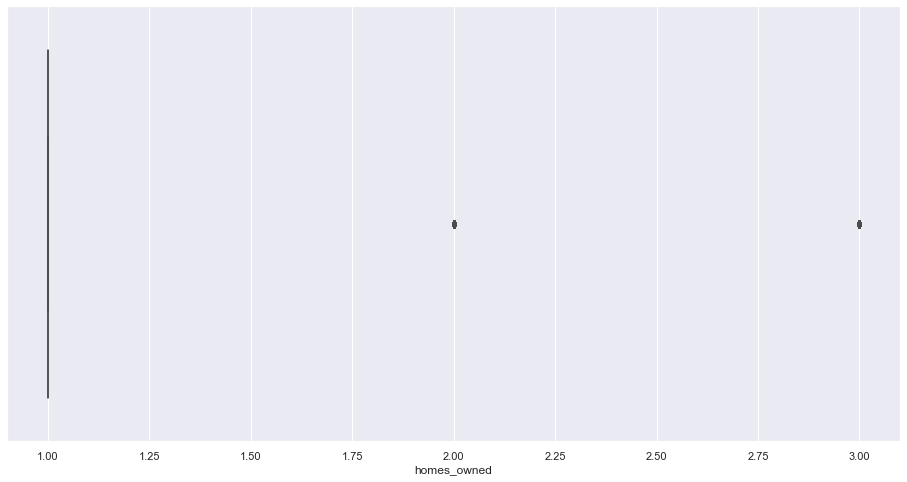

1st Quartile:  1.0  3rd Quartile:  1.0


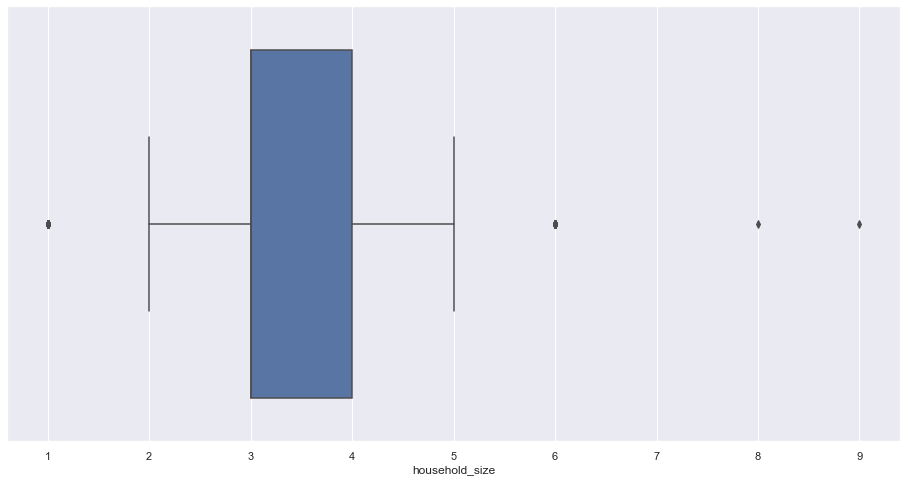

1st Quartile:  3.0  3rd Quartile:  4.0


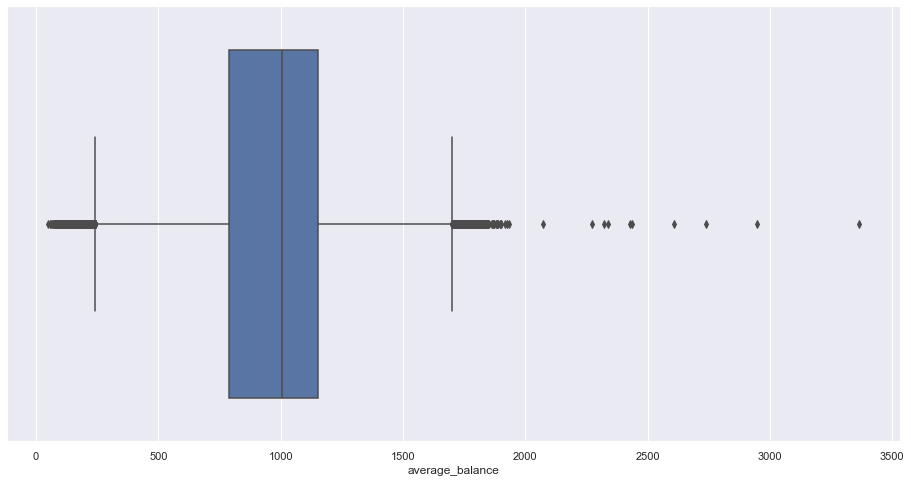

1st Quartile:  787.9375  3rd Quartile:  1152.5625


In [32]:
for col in df1_num: # Visualizing Outliers
    sns.boxplot(x = df1_num[col])
    
    Q1 = df1_num[col].quantile(0.25)
    Q3 = df1_num[col].quantile(0.75)
    #Calculating Quartiles of that column
    
    plt.show()
    print("1st Quartile: ", Q1, " 3rd Quartile: ", Q3)

In [33]:
Q1 = df['average_balance'].quantile(0.25)
Q3 = df['average_balance'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['average_balance'] <= Q1 - 1.5 * IQR) | (df['average_balance'] >= Q3 + 1.5 *IQR)
outlier_balance=df.loc[filter]  

In [34]:
outlier_balance

,offer_accepted,reward,mailer_type,income_level,accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,0
22,No,Cash Back,Letter,High,1,No,High,1,1,3,Yes,1754.00,1876.0,1717.0,1507.0,1916.0,0
41,No,Air Miles,Letter,High,1,No,Medium,3,1,3,Yes,172.00,340.0,26.0,95.0,227.0,0
79,No,Cash Back,Postcard,Medium,2,No,Low,1,1,3,Yes,1735.50,1610.0,1746.0,1972.0,1614.0,0
91,No,Air Miles,Letter,Medium,1,No,High,3,1,3,Yes,167.00,195.0,124.0,190.0,159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17916,No,Cash Back,Letter,Low,1,Yes,High,1,2,3,No,163.25,265.0,46.0,280.0,62.0,0
17930,No,Cash Back,Postcard,High,1,No,Medium,2,1,3,No,131.50,245.0,14.0,27.0,240.0,0
17951,No,Points,Letter,Medium,3,No,High,2,1,5,Yes,240.50,374.0,104.0,323.0,161.0,0
17953,No,Cash Back,Letter,Low,1,No,Low,1,2,2,Yes,233.75,354.0,463.0,99.0,19.0,0


In [35]:
outlier_balance.loc[outlier_balance['offer_accepted']=='Yes']

,offer_accepted,reward,mailer_type,income_level,accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer
101,Yes,Points,Postcard,High,1,Yes,Low,1,1,9,No,161.50,44.0,99.0,454.0,49.0,1
342,Yes,Points,Postcard,Low,1,No,Low,2,1,5,No,1735.25,1626.0,1713.0,1902.0,1700.0,1
605,Yes,Air Miles,Letter,High,2,Yes,Medium,1,1,4,Yes,175.75,389.0,16.0,94.0,204.0,1
661,Yes,Points,Postcard,Low,1,No,Low,2,1,4,Yes,178.50,197.0,464.0,11.0,42.0,1
669,Yes,Points,Letter,Low,1,No,Low,2,1,6,Yes,140.00,145.0,65.0,120.0,230.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16427,Yes,Cash Back,Postcard,Medium,1,No,Medium,2,1,3,Yes,153.00,17.0,245.0,196.0,154.0,1
17198,Yes,Air Miles,Letter,Low,1,No,Low,1,3,4,No,162.50,33.0,121.0,290.0,206.0,1
17552,Yes,Air Miles,Letter,High,1,Yes,Low,4,1,4,No,229.75,499.0,68.0,39.0,313.0,1
17848,Yes,Cash Back,Letter,Low,1,No,Low,2,1,3,Yes,162.50,165.0,323.0,18.0,144.0,1


## Bring the Data Together

In [39]:
df1_cat_dummies

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17995,0,1,0,0,0,0,0,1,0,1
17996,0,1,0,0,0,0,0,1,0,1
17997,0,1,0,0,0,0,0,1,0,0
17998,0,1,0,0,0,1,0,0,1,1


In [40]:
df1_num

,accounts_open,credit_cards_held,homes_owned,household_size,average_balance
0,1,2,1,4,1160.75
1,1,2,2,5,147.25
2,2,2,1,2,276.50
3,2,1,1,4,1219.00
4,1,2,1,6,1211.00
...,...,...,...,...,...
17995,1,1,1,5,167.50
17996,1,3,1,3,850.50
17997,1,2,1,4,1087.25
17998,1,4,2,2,1022.25


In [36]:
df1_full = pd.concat([df1_cat_dummies,df1_num],axis=1)

# Export CSV

In [37]:
df.to_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\databases\df.xlsx', index=False)
df1_full.to_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\databases\df_dummies.xlsx', index=False)